In [1]:
### import libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv("loan.csv")                                            ### loading dataset into pandas

In [14]:
### dataset analyzing
print("SHAPE:",    df.shape)
print("COLUMNS:",  df.columns)
print("HEAD:",     df.head())
print("DESCRIBE:", df.describe()) 

SHAPE: (614, 13)
COLUMNS: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
HEAD:     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583       

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
df.isnull().sum()                                                    ### to find null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#which features has null values:- 1. Gender ,2. Married  ,3. Dependents ,4. Self_Employed ,5. LoanAmount ,6. Loan_Amount_Term , 7. Credit_History 

In [17]:
## Handling the null value columns
for col in ["Gender","Married","Dependents","Self_Employed","LoanAmount","Loan_Amount_Term","Credit_History"]:
     df[col] = df[col].fillna(df[col].mode()[0])                                                     

df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [18]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [10]:
#categorical columns(letters):- Gender, Married, Education, Self_Employed, Property_Area, Loan_Status

In [19]:
### convert categorical columns to numerical values        # label encoding(letter to number[zeros&ones])

df.replace({'Gender':{'Male':1,'Female':0},
            'Married':{'No':0,'Yes':1},
            'Education':{'Graduate':1,'Not Graduate':0},
            'Self_Employed':{'No':0,'Yes':1},
            'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
            "Loan_Status":{'N':0,'Y':1}},inplace=True)

df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0


In [20]:
df = df.replace(to_replace='3+', value=4) 

<AxesSubplot:>

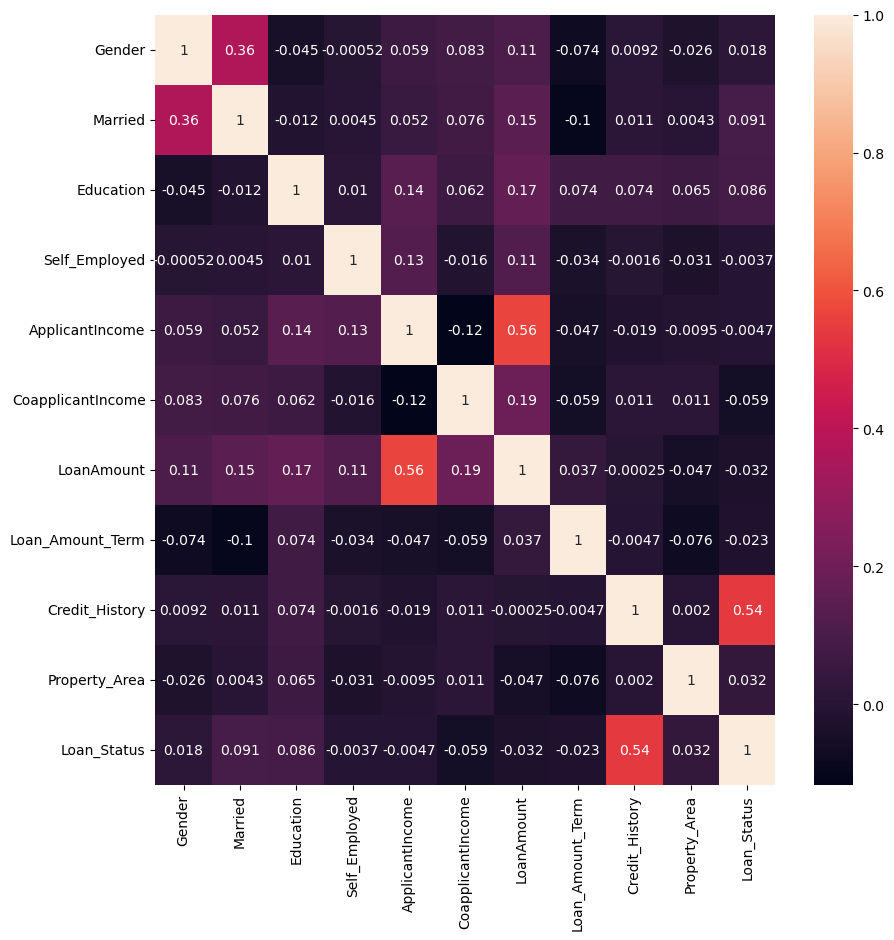

In [22]:
###Data Visualization
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [23]:
 # +VE CORRELATION, -VE CORRELATION.

In [26]:
categorical_data = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area"]    #splitting features for better analysis
continuous_data = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]

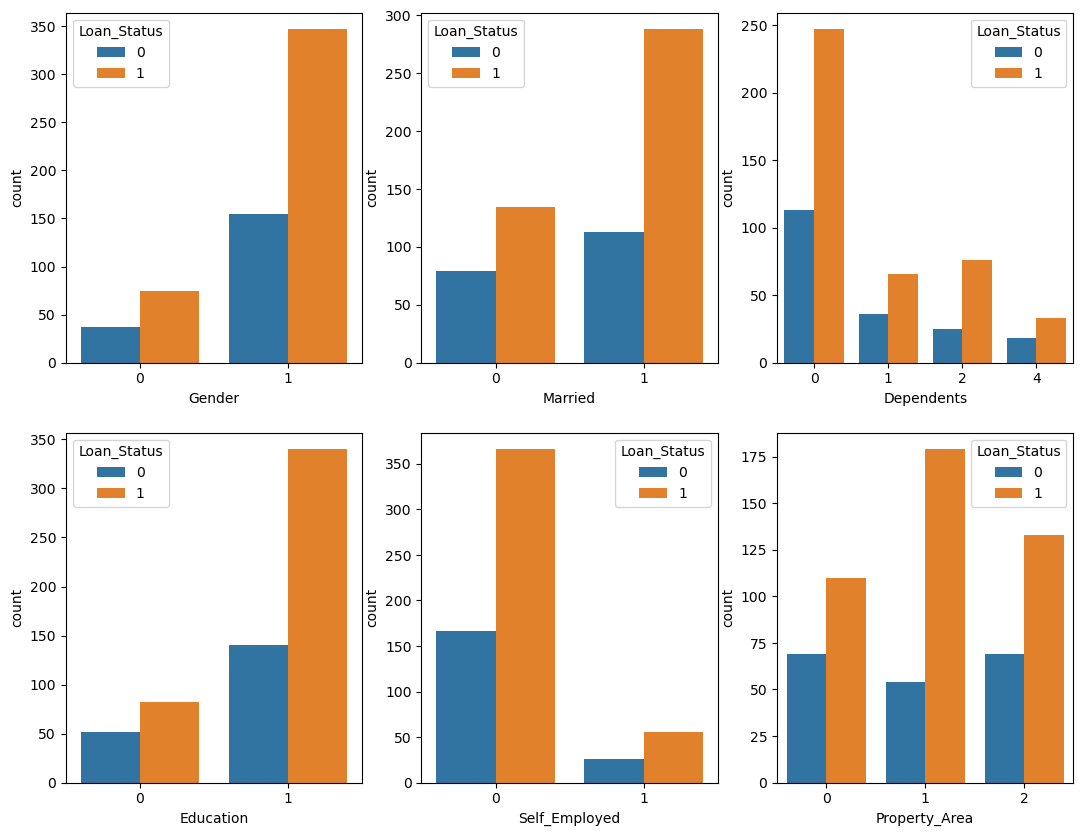

In [27]:
# Plotting the impact of categorical variables on Loan_Status

plt.figure(figsize=(13,10))
for i,cat in enumerate(categorical_data):
    plt.subplot(2,3,i+1)
    sns.countplot(data = df, x= cat, hue = "Loan_Status")
plt.show()

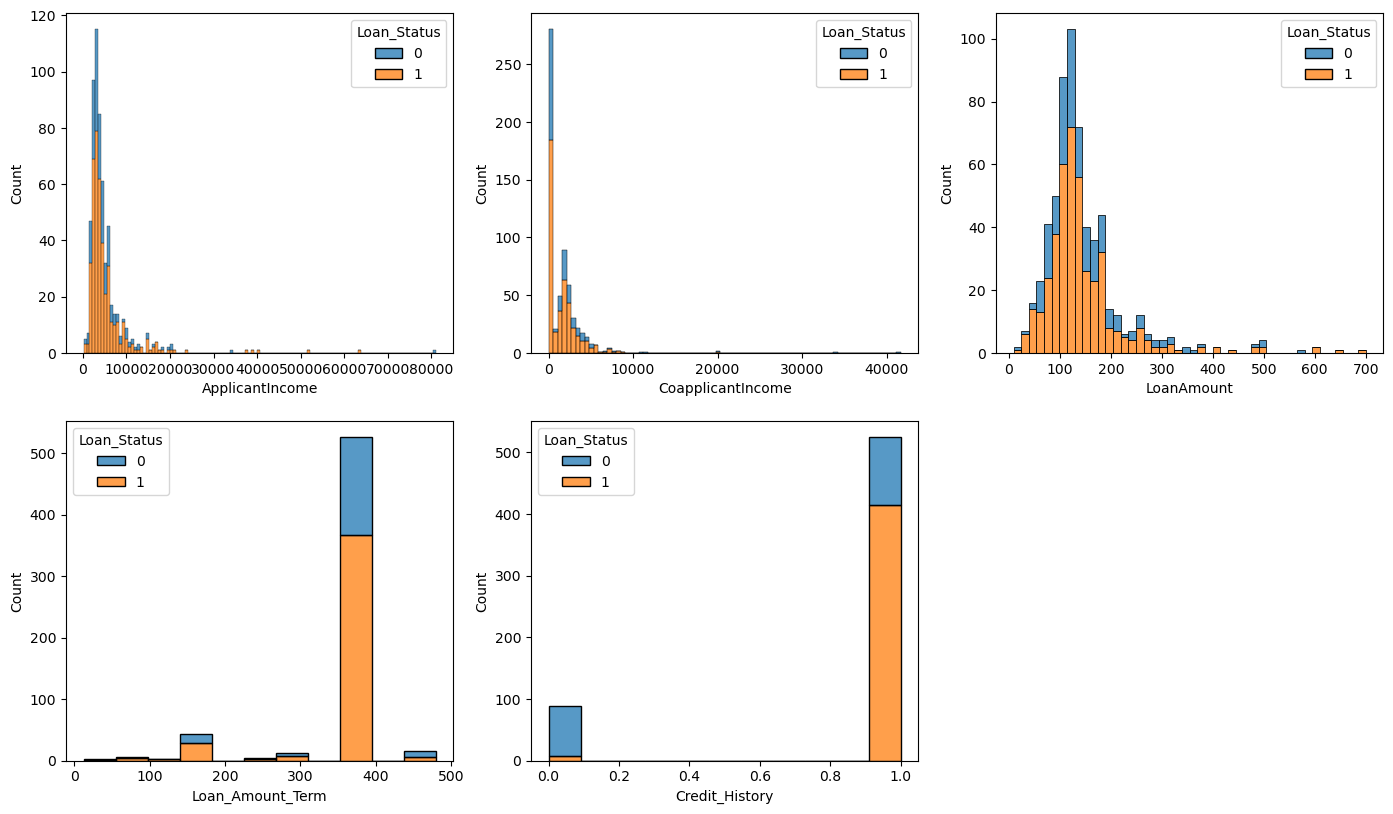

In [28]:
# Plotting the impact of continuous variables on Loan_Status

plt.figure(figsize=(17,15))
for j,con in enumerate(continuous_data):
    plt.subplot(3,3,j+1)                                                                           
    sns.histplot(data = df, x= con, hue = "Loan_Status", multiple="stack")
plt.show()

In [29]:
for i,cat in enumerate(categorical_data):
    print(i, cat)

0 Gender
1 Married
2 Dependents
3 Education
4 Self_Employed
5 Property_Area


In [30]:
for i,cat in enumerate(continuous_data):
    print(i, cat)

0 ApplicantIncome
1 CoapplicantIncome
2 LoanAmount
3 Loan_Amount_Term
4 Credit_History


In [31]:
# separating the data and label
Y = df['Loan_Status']
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)              

In [32]:
#DATA MODELING
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [33]:
### CLASSIFICATION ALGORITHMS

from sklearn.linear_model import LogisticRegression          #1
from sklearn.svm import SVC                                  #2
from sklearn.tree import DecisionTreeClassifier              #3
from sklearn.naive_bayes import GaussianNB                   #4
from sklearn.ensemble import RandomForestClassifier          #5
from sklearn.neighbors import KNeighborsClassifier           #6

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
#1 Logistic Regression
LRM = LogisticRegression()                                                     
LRM.fit(X_train, Y_train)
LRM_PRED = LRM.predict(X_test)

LR_accu = accuracy_score(LRM_PRED, Y_test) 
print("Logistic Accuracy Score: ","{:.2f}%".format(100*LR_accu))   

Logistic Accuracy Score:  77.42%


In [36]:
#2 Support Vector Machine
SVM = SVC()                                                             
SVM.fit(X_train, Y_train)
SVM_PRED = SVM.predict(X_test)

SVM_accu = accuracy_score(SVM_PRED, Y_test)
print("Support Vector Machine Accuracy Score: ","{:.2f}%".format(100*SVM_accu)) 

Support Vector Machine Accuracy Score:  67.74%


In [37]:
#3 Decison Tree Classifier
DTCM = DecisionTreeClassifier(criterion="entropy", max_depth=2)               
DTCM.fit(X_train, Y_train)
DTCM_pred = DTCM.predict(X_test)

DTCM_accu = accuracy_score(DTCM_pred, Y_test)
print("Decison Tree Classifier Accuracy Score: ","{:.2f}%".format(100*DTCM_accu))

Decison Tree Classifier Accuracy Score:  79.03%


In [38]:
#4 Naive Bayes
NBM = GaussianNB()                                                         
NBM.fit(X_train, Y_train)
NBM_pred = NBM.predict(X_test)

NBM_accu = accuracy_score(NBM_pred, Y_test)
print("Naive Bayes Accuracy Score: ","{:.2f}%".format(100*NBM_accu))

Naive Bayes Accuracy Score:  77.42%


In [39]:
#5 Random Forest Classifier
RFM = RandomForestClassifier()                                          
RFM.fit(X_train, Y_train,)
RFM_pred = RFM.predict(X_test)

RFM_accu = accuracy_score(RFM_pred, Y_test)
print("Random Forest Classifier Accuracy Score: ","{:.2f}%".format(100*RFM_accu))

Random Forest Classifier Accuracy Score:  75.81%


In [50]:
#1. Logistic Accuracy Score:  77.42%
#2. Support Vector Machine Accuracy Score:  67.74%
#3. Decison Tree Classifier Accuracy Score:  79.03%
#4. Naive Bayes Accuracy Score:  77.42%
#5. Random Forest Classifier Accuracy Score:  75.81%